In [1]:
#import the necessory libraries
import pandas as pd
import numpy as np

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import plotly
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets load the dataset
data=pd.read_csv('Car details v3.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
#let the check the shape of the dataset
data.shape

(8128, 13)

here we have 8128 Rows and 13 columns

In [4]:
#let check for null value
data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

So,here we have null values in 5 columns.lets see what we can do with nulls

In [5]:
#lets check the duplicated values
data.duplicated().sum()

1202

So, here we have 1202 duplicated.lets drop all the duplicated values because this data is scraped from car24.com .so seller try to put his car always in top of the page so they can update daily in car24.co,m

In [6]:
#lets drop duplicates
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(6926, 13)

So,Now we have 6926 columns.Lets move forward to check datatypes


In [8]:
#lets check the datatypes of the dataset
data.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

So, here we have 9 object type column, 3 int type columns, and float values column



In [9]:
#lets check the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB


In [10]:
#lets check statistical summary of the dataset
data.describe()

,year,selling_price,km_driven,seats
count,6926.000000,6.926000e+03,6.926000e+03,6718.000000
mean,2013.420300,5.172707e+05,7.399568e+04,5.434653
std,4.078286,5.197670e+05,5.835810e+04,0.984230
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Observations
Null value in seats
Outliers in seats

In [11]:
#lets describe the dataset with object columns
data.describe(include='O')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6926,6926,6926,6926,6926,6718,6718,6721,6717
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,118,3755,6218,6342,4242,210,907,324,472


Observation
Null value in mileage engine, max_power,torque

# EDA -> Exploratory Data Analysis

# Univariate Analysis

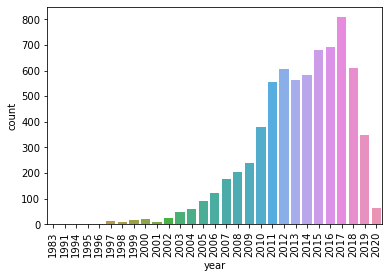

2017    808
2016    693
2015    681
2018    608
2012    604
2014    581
2013    562
2011    554
2010    380
2019    347
2009    240
2008    205
2007    176
2006    123
2005     91
2020     63
2004     60
2003     47
2002     26
2000     20
1999     17
1997     11
1998     10
2001      9
1996      3
1994      3
1995      2
1983      1
1991      1
Name: year, dtype: int64

In [12]:
#lets plot year
sns.countplot(x='year',data=data)
plt.xticks(rotation=90)
plt.show()
data['year'].value_counts()

Here we can see that in 2017 most of the car sold.As compare to 2016 and 2015

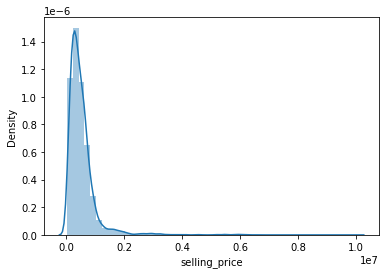

In [13]:
#lets plot selling_price
sns.distplot(data['selling_price'])
plt.show()

So, here we can see that our selling_price is right skewed but we dont do any chnages because ita a dependent variables/response variable

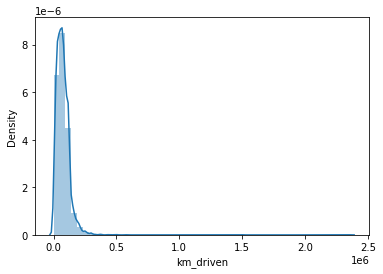

In [14]:
#lets plot km_driven
sns.distplot(data['km_driven'])
plt.show()

Here we can see that our data is right skewed

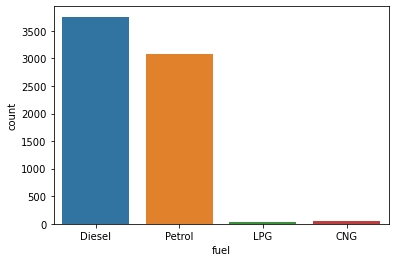

Diesel    3755
Petrol    3077
CNG         56
LPG         38
Name: fuel, dtype: int64

In [15]:
#lets plot fuel
sns.countplot(x='fuel',data=data)
plt.show()
data['fuel'].value_counts()

So, Here we can see that most of the car sold is a diesel car and petrol car, LPG and CNG car sold least.

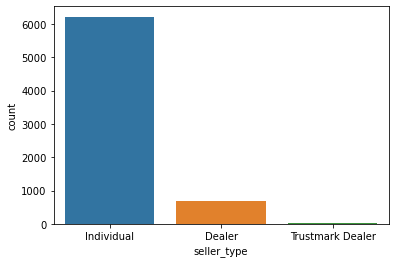

Individual          6218
Dealer               681
Trustmark Dealer      27
Name: seller_type, dtype: int64

In [16]:
#lets plot seller_type
sns.countplot(x='seller_type',data=data)
plt.show()
data['seller_type'].value_counts()

here we can see that individua most of the car sold and then dealer seller_type then trusrmark dealer

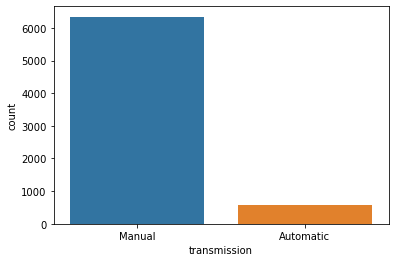

Manual       6342
Automatic     584
Name: transmission, dtype: int64

In [17]:
#lets plot transmission
sns.countplot(x='transmission',data=data)
plt.show()
data['transmission'].value_counts()

Here we can see that maximum car sold is manual and less are Automatic

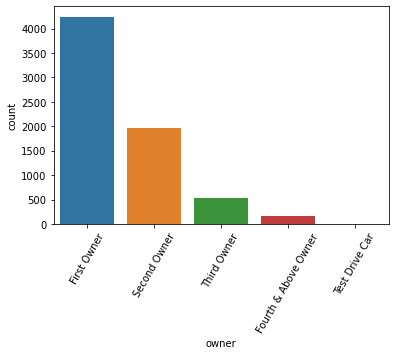

First Owner             4242
Second Owner            1974
Third Owner              536
Fourth & Above Owner     169
Test Drive Car             5
Name: owner, dtype: int64

In [18]:
#lets plot owner
sns.countplot(x='owner',data=data)
plt.xticks(rotation=60)
plt.show()
data['owner'].value_counts()

Here we can see that most of the car is sold by first owner and then second and then third ...

Least are Fourth and above car and then Test Drive Car

In [19]:
#Lets convert mileage in int
#let's replace "," sign by empty space
data['mileage']=data['mileage'].str.replace('kmpl','')

In [20]:
data['mileage']=data['mileage'].str.replace('km/kg','')

In [21]:
data['mileage']=data['mileage'].astype(float)

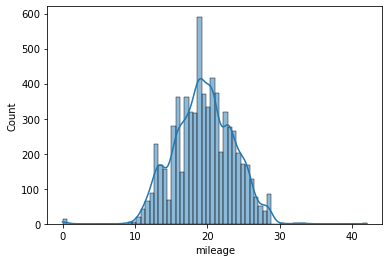

In [22]:
#lets plot mileage
sns.histplot(data['mileage'],kde=True)
plt.show()

Not a Normal Distributed.Contain Some Outlier

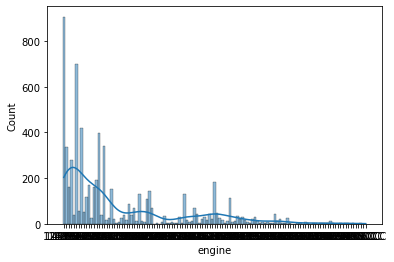

In [23]:
#lets  plot Engine
sns.histplot(data['engine'],kde=True)
plt.show()

In [24]:
#Lets convert max_power in int 
# Let's replace "," sign by empty space
data['max_power'] = data['max_power'].str.replace('bhp','')

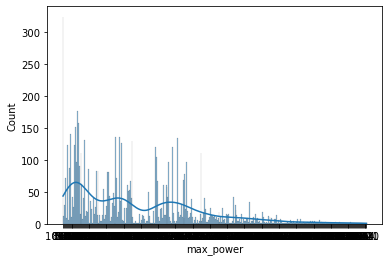

In [25]:
#Lets plot max_power
sns.histplot(x='max_power',data=data,kde=True)
plt.show()

So,Here we can see that we have right skewed data

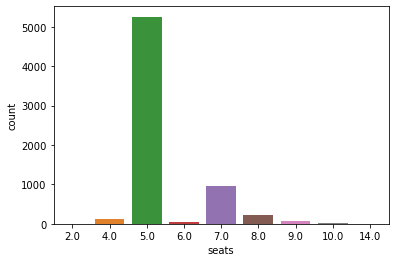

5.0     5254
7.0      966
8.0      222
4.0      124
9.0       74
6.0       57
10.0      18
2.0        2
14.0       1
Name: seats, dtype: int64

In [26]:
#lets plot seat
sns.countplot(x='seats',data=data)
plt.show()
data['seats'].value_counts()

Here we can see that maximum car have 5 seats and then 7 seats .minimum car have 14 seats but maybe its a outliers,lets move foreward to Bivariate and make good domain knowledge about this dataset.

# Bivariate Analysis

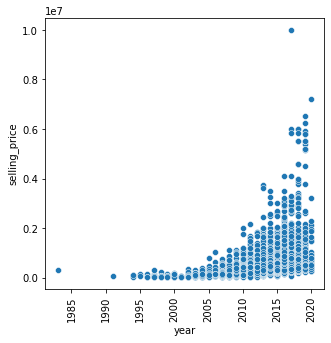

In [27]:
#lets plot price with Selling year
plt.figure(figsize=(5,5))
sns.scatterplot(x='year',y='selling_price',data=data)
plt.xticks(rotation=90)
plt.show()


Here we can see.As year increase price are also increase and in old time car is not sold

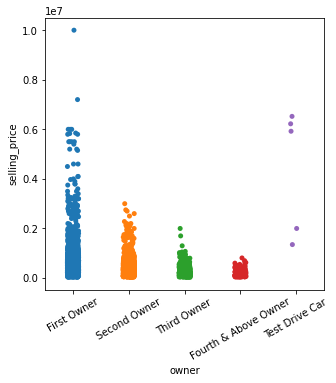

In [28]:
#Lets plot price with owner
plt.figure(figsize=(5,5))
sns.stripplot(y='selling_price',x='owner',data=data)
plt.xticks(rotation=30)
plt.show()

Here we can see that if car is first owner then price is also high.Test drive car are very less.

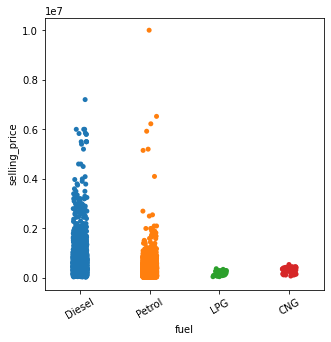

In [29]:
#lets plot price with fuel
plt.figure(figsize=(5,5))
sns.stripplot(y='selling_price',x='fuel',data=data)
plt.xticks(rotation=30)
plt.show()

Here, We can see that Diesel car are most costly compare to Petrol and then CNG then LPG

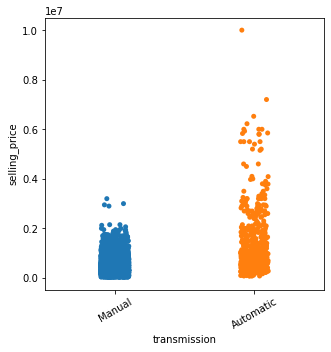

In [30]:
#lets plot price with transmission
plt.figure(figsize=(5,5))
sns.stripplot(y='selling_price',x='transmission',data=data)
plt.xticks(rotation=30)
plt.show()

Here we can see that Automatic car most costly then Mannual

<Figure size 360x360 with 0 Axes>

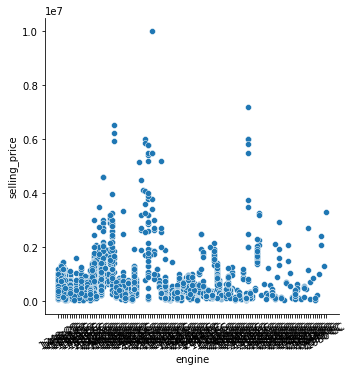

In [31]:
#Lets plot price with engine
plt.figure(figsize=(5,5))
sns.relplot(y='selling_price',x='engine',data=data)
plt.xticks(rotation=30)
plt.show()
           

So, Here we can see that as the price increase engine power also increase

<Figure size 360x360 with 0 Axes>

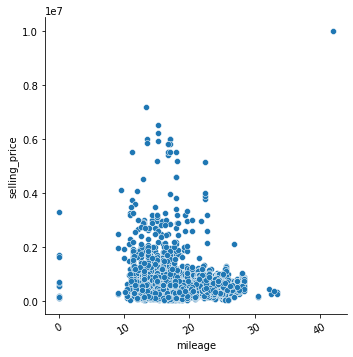

In [32]:
#Lets plot price With mileage
plt.figure(figsize=(5,5))
sns.relplot(y='selling_price',x='mileage',data=data,)
plt.xticks(rotation=30)
plt.show()

Here , We can see that between 10 to 30 most of the car lier . and very few cars are not not comes between 10 to 30

<Figure size 360x360 with 0 Axes>

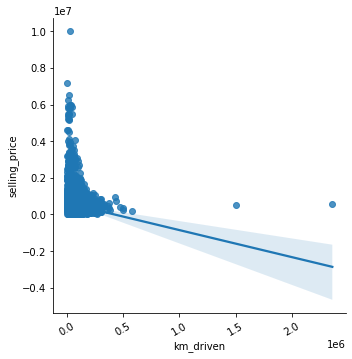

In [33]:
#Lets plot price With km_driven
plt.figure(figsize=(5,5))
sns.lmplot(y='selling_price',x='km_driven',data=data,)
plt.xticks(rotation=30)
plt.show()

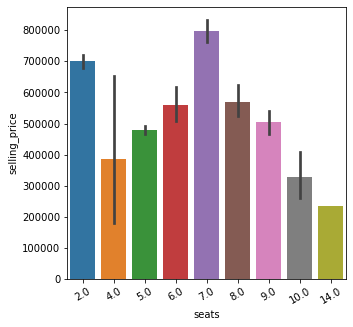

In [34]:
#Lets seats with km driven
plt.figure(figsize=(5,5))
sns.barplot(y='selling_price',x='seats',data=data)
plt.xticks(rotation=30)
plt.show()

So,here we can see that 7 seater car more expensive then other car, and then expensive is 2.0 and then follow to 8 seater car, and least is 14.0 in  y term 14 seater car is outlier

In [35]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

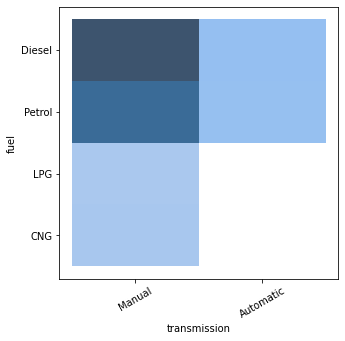

In [36]:
#lets Transmission with km_driven
plt.figure(figsize=(5,5))
sns.histplot(x='transmission',y='fuel',data=data)
plt.xticks(rotation=30)
plt.show()

So.Here we can see that only Mannual car come in Diesel ,Petrol,LPG and CNG.But Automatic car come in Diesel and Petrol.

# Multivariate Analysis

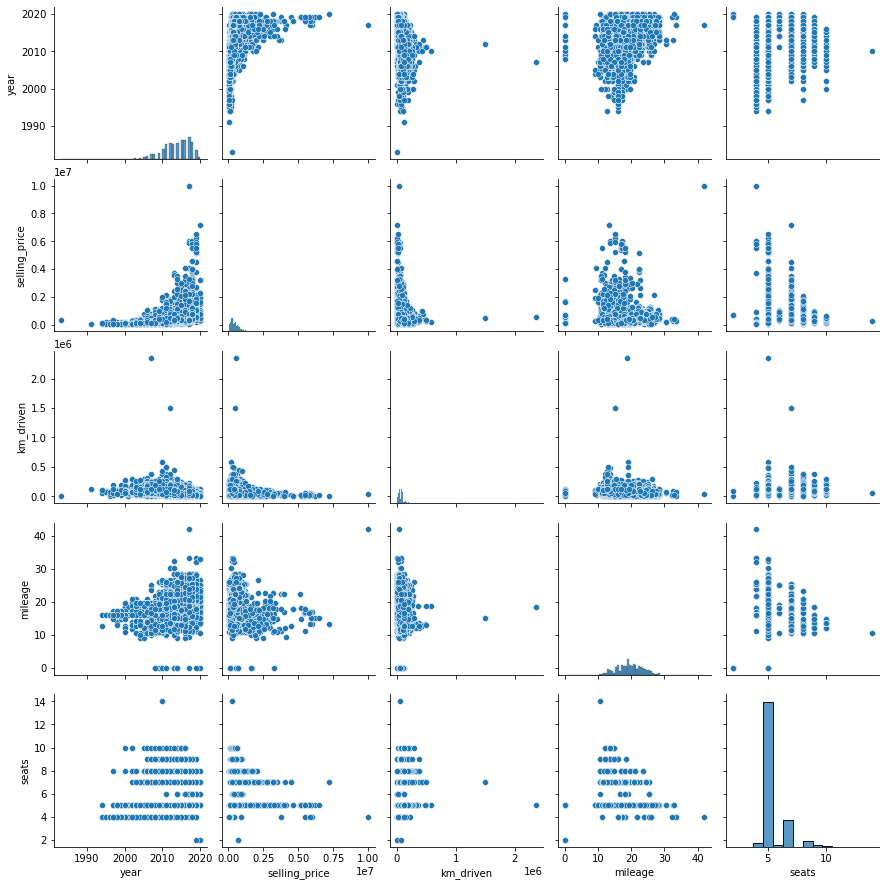

In [37]:
#lets PLot pair plot for all continious Data
sns.pairplot(data)
plt.show()

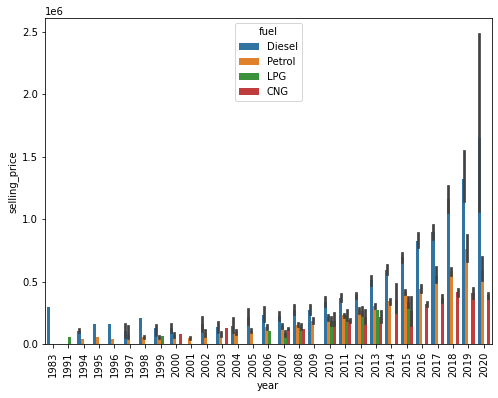

In [38]:
#lets plot year with selling price and fuel
plt.figure(figsize=(8,6))
sns.barplot(y='selling_price',x='year',hue='fuel',data=data)
plt.xticks(rotation=90)
plt.show()

So, Here we can see that as the year increases car price is also increases and CNG stareted in 2001. and first LPG car selling start on 1991 and then agian start in 1999 and its continiously start from 2006 and after 2015 LPG car stop manufecturing.

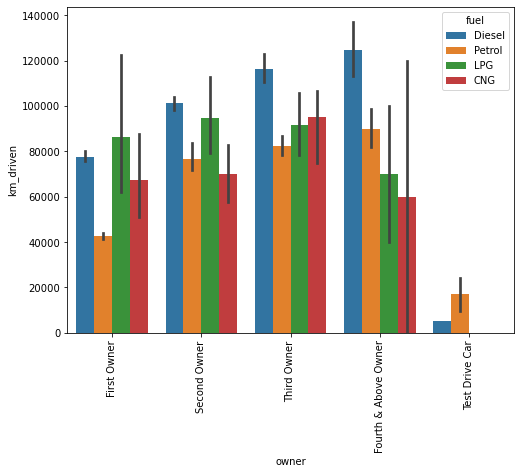

In [39]:
#Lets plot year with selling Price and Fuel
plt.figure(figsize=(8,6))
sns.barplot(y='km_driven',x='owner',hue='fuel',data=data)
plt.xticks(rotation=90)
plt.show()

So, Here we can see that as the KM increases Owners is also increases . and we can see that Diesel car are more effecient then other varients

In [40]:
#Select all numerical columns for ploting Distplot and Box plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf

,year,selling_price,km_driven,mileage,seats
0,2014,450000,145500,23.40,5.0
1,2014,370000,120000,21.14,5.0
2,2006,158000,140000,17.70,5.0
3,2010,225000,127000,23.00,5.0
4,2007,130000,120000,16.10,5.0
...,...,...,...,...,...
8121,2013,260000,50000,18.90,5.0
8122,2014,475000,80000,22.54,5.0
8123,2013,320000,110000,18.50,5.0
8124,2007,135000,119000,16.80,5.0


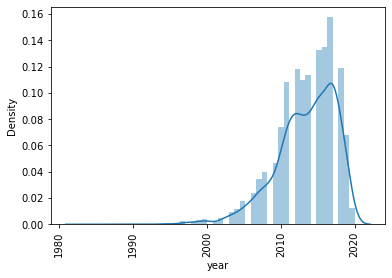

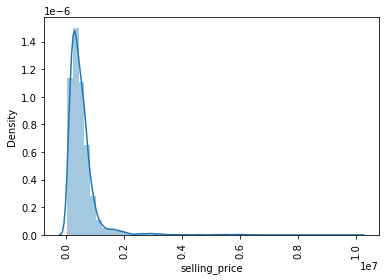

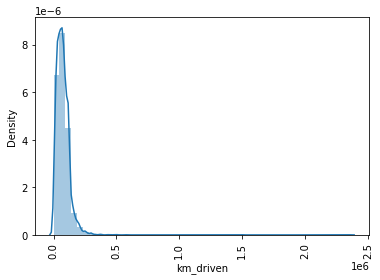

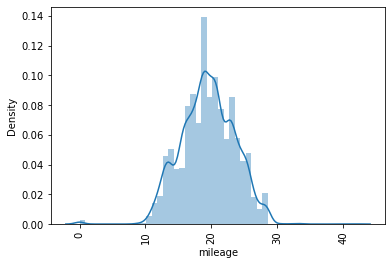

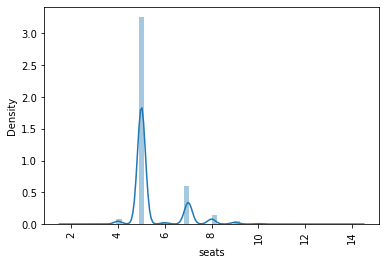

In [41]:
#Lets plot Dist plot
for i in newdf:
    plt.figure()
    sns.distplot(newdf[i])
    plt.xticks(rotation=90)
    plt.show()

So , Here we can see that all the columns are skewed . no one columns are normally distributed

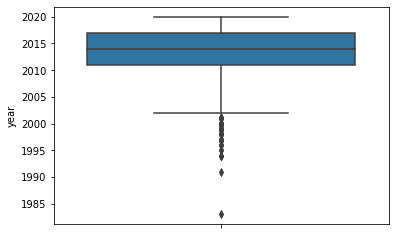

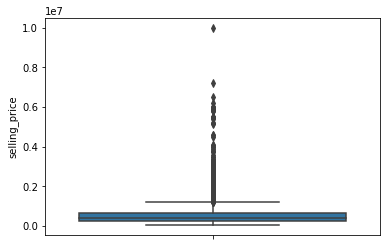

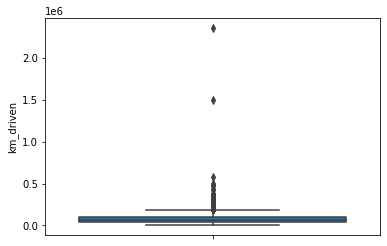

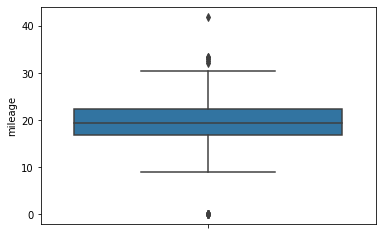

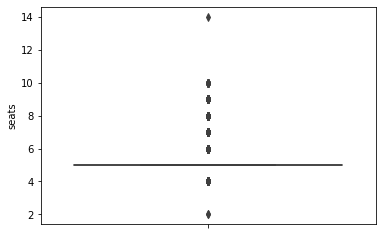

In [42]:
#Lets plot Dist plot
for i in newdf:
    plt.figure()
    sns.boxplot(y=newdf[i])
    plt.xticks(rotation=90)
    plt.show()

So, Here we can see that all the columns are contain Null Values .

** So Here We Completed Visualization Part ** Lets Move Foreward to Data Preprocessing Step.

# Data Preprocessing

In [43]:
#lets first drop unwanted columns
data.drop(columns=['name','torque'],inplace=True)


This Columns dont participate in model building So i decided to remove both the columns

In [44]:
#Lets check the shape of the dataset again
data.shape

(6926, 11)

In [45]:
#lets check for null values
data.isna().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
seats            208
dtype: int64

Here we have null values Lets fill this by Foreward fill and backword fillMethod

In [47]:
#lets fill the null values
data['mileage'].fillna(method='ffill',inplace=True)
data['engine'].fillna(method='ffill',inplace=True)
data['max_power'].fillna(method='ffill',inplace=True)
data['seats'].fillna(method='ffill',inplace=True)
data.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [49]:
#lets plot dataset again
data.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2,5.0
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197 CC,81.86,5.0
6,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061 CC,57.5,5.0
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796 CC,37,4.0
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364 CC,67.1,5.0
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399 CC,68.1,5.0


In [50]:
#Lets Check for Outliers
#Select all numerical columns for ploting Distplot and Box plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf

,year,selling_price,km_driven,mileage,seats
0,2014,450000,145500,23.40,5.0
1,2014,370000,120000,21.14,5.0
2,2006,158000,140000,17.70,5.0
3,2010,225000,127000,23.00,5.0
4,2007,130000,120000,16.10,5.0
...,...,...,...,...,...
8121,2013,260000,50000,18.90,5.0
8122,2014,475000,80000,22.54,5.0
8123,2013,320000,110000,18.50,5.0
8124,2007,135000,119000,16.80,5.0


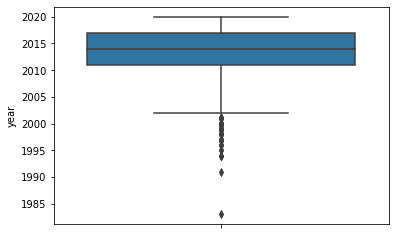

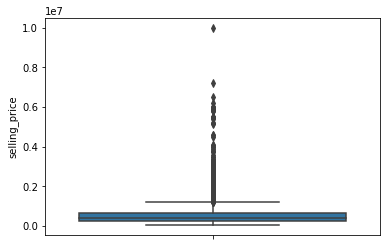

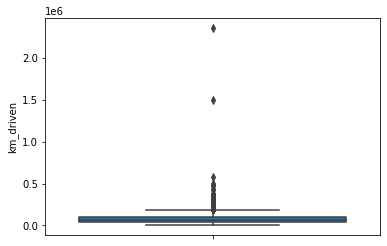

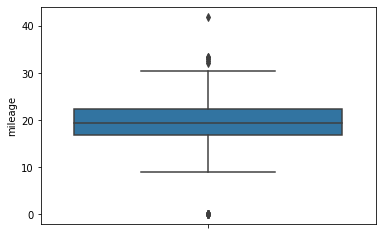

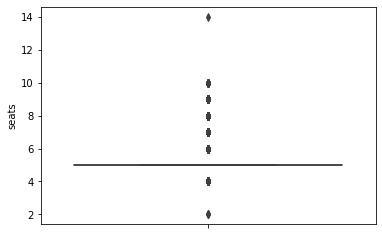

In [51]:
#Lets plot Dist plot
for i in newdf:
    plt.figure()
    sns.boxplot(y=newdf[i])
    plt.xticks(rotation=90)
    plt.show()

# lets Remove Outlier

In [52]:
import numpy as np
from scipy.stats import zscore

In [53]:
features=data[['year','km_driven','mileage','seats']]

In [54]:
#using zscore to remove outliers
z=np.abs(zscore(features))
z

,year,km_driven,mileage,seats
0,0.142153,1.225357,0.973216,0.442435
1,0.142153,0.788368,0.416753,0.442435
2,1.819597,1.131104,0.430252,0.442435
3,0.838722,0.908326,0.874727,0.442435
4,1.574378,0.788368,0.824208,0.442435
...,...,...,...,...
8121,0.103066,0.411210,0.134785,0.442435
8122,0.142153,0.102895,0.761464,0.442435
8123,0.103066,0.617000,0.233274,0.442435
8124,1.574378,0.771231,0.651852,0.442435


In [57]:
# Creating new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998 CC,67.1,5.0
8122,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396 CC,88.73,5.0
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197 CC,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493 CC,110,5.0


In [58]:
# Shape of original dataset
data.shape

(6926, 11)

In [59]:
#After Removing Outliers
new_df.shape

(6677, 11)

In [60]:
# Checking the the data loss
data_loss = (6926-6592)/6926*100
data_loss

4.822408316488594

# ii) IQR (Inter Quantile Range) method

In [61]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [62]:
df1.shape

(5292, 11)

In [63]:
# Checking the the data loss
data_loss = (6926-5292)/6926*100
data_loss

23.592261045336414

So, in IQR Method we can see that we lost out 26.78 % data . lets move foreward with Z score if we dont get better result with Z Score Method then we choose IQR Method.

# Encoding the categorical columns using label encoding

In [64]:
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)        

['fuel', 'seller_type', 'transmission', 'owner', 'engine', 'max_power']


In [66]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,fuel,seller_type,transmission,owner,engine,max_power
0,1,1,1,0,13,235
1,1,1,1,2,35,14
2,3,1,1,4,34,244
3,1,1,1,0,24,288
4,3,1,1,0,14,279
...,...,...,...,...,...,...
8121,3,1,1,2,115,217
8122,1,1,1,2,24,283
8123,3,1,1,0,10,258
8124,1,1,1,1,31,28


# Correleation between the target  variable and features using HEAT map

In [67]:
#checking the correlation
cor=new_df.corr()
cor

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
year,1.000000,0.446375,-0.496741,-0.053527,-0.126498,-0.141266,-0.463193,0.354459,-0.145145,0.098219,0.021052
selling_price,0.446375,1.000000,-0.221513,-0.250454,-0.251938,-0.464460,-0.225615,-0.133110,0.015478,-0.210375,0.187735
km_driven,-0.496741,-0.221513,1.000000,-0.348551,0.128327,0.142143,0.314288,-0.202039,-0.004435,-0.124116,0.197790
fuel,-0.053527,-0.250454,-0.348551,1.000000,0.041492,-0.024732,-0.018005,-0.115256,0.159796,0.135419,-0.324046
seller_type,-0.126498,-0.251938,0.128327,0.041492,1.000000,0.175476,0.143944,-0.007426,0.013460,0.033967,0.015945
transmission,-0.141266,-0.464460,0.142143,-0.024732,0.175476,1.000000,0.077240,0.183630,-0.063381,0.182534,0.003673
owner,-0.463193,-0.225615,0.314288,-0.018005,0.143944,0.077240,1.000000,-0.170030,0.041923,-0.073825,0.007304
mileage,0.354459,-0.133110,-0.202039,-0.115256,-0.007426,0.183630,-0.170030,1.000000,-0.183709,0.470629,-0.470693
engine,-0.145145,0.015478,-0.004435,0.159796,0.013460,-0.063381,0.041923,-0.183709,1.000000,-0.339235,0.191984
max_power,0.098219,-0.210375,-0.124116,0.135419,0.033967,0.182534,-0.073825,0.470629,-0.339235,1.000000,-0.342824


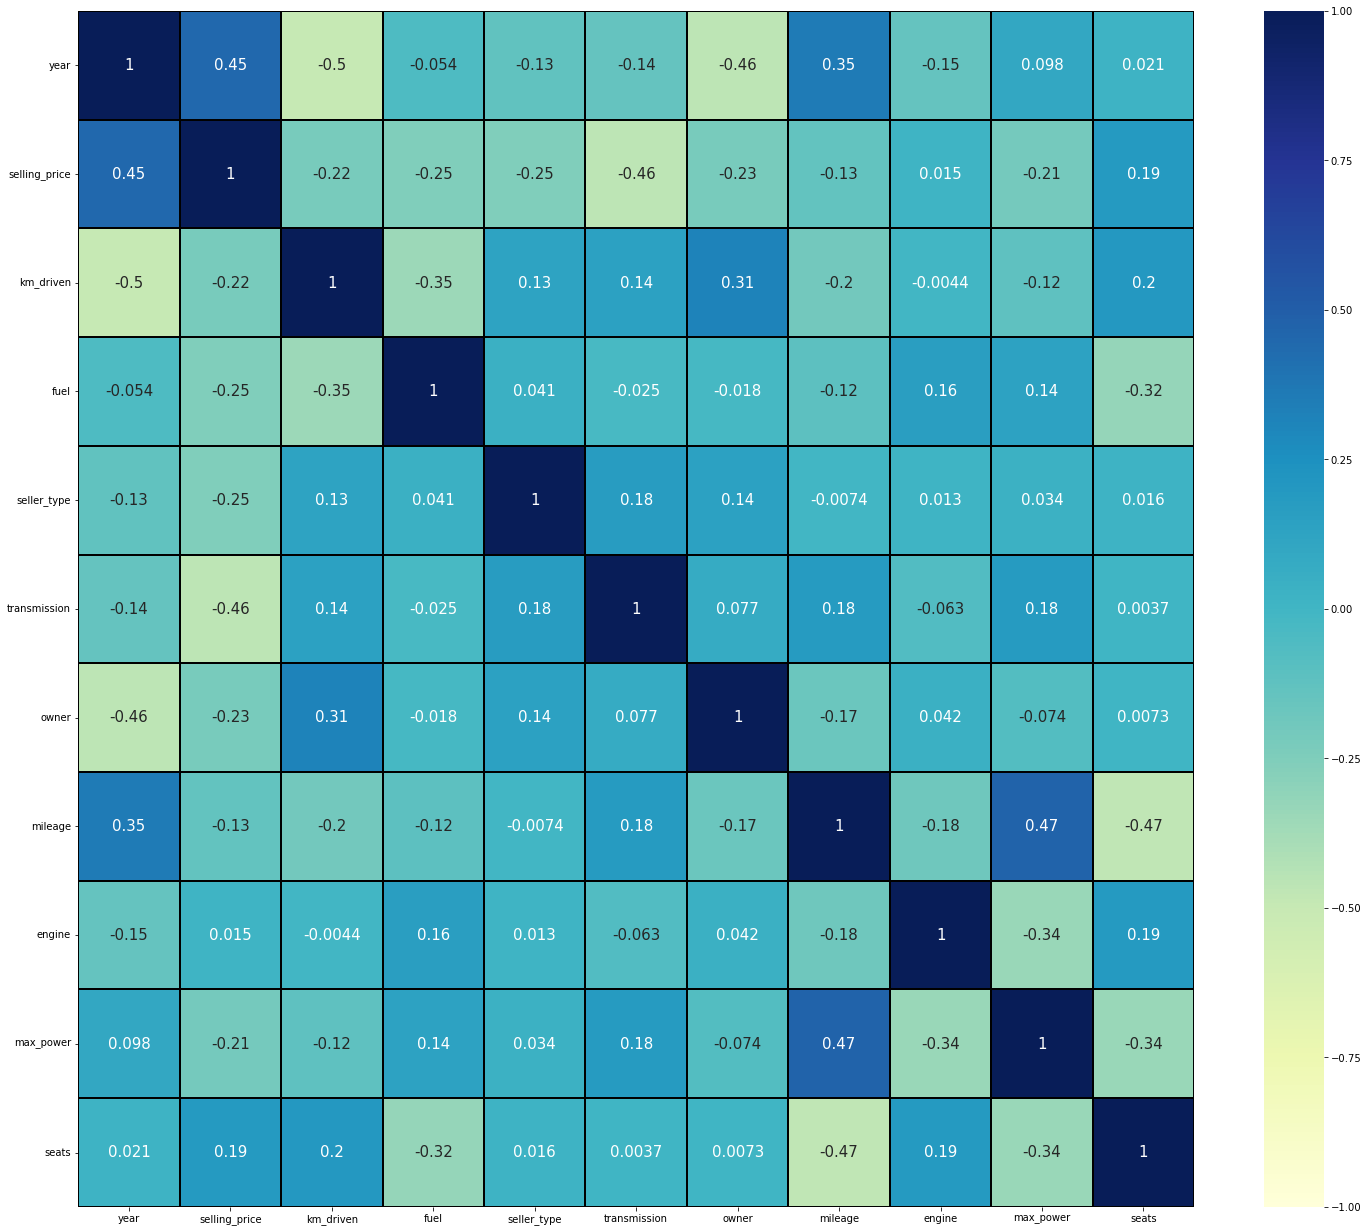

In [68]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

# Visualizing the correlation between label(primary_fuel) and features using bar plot

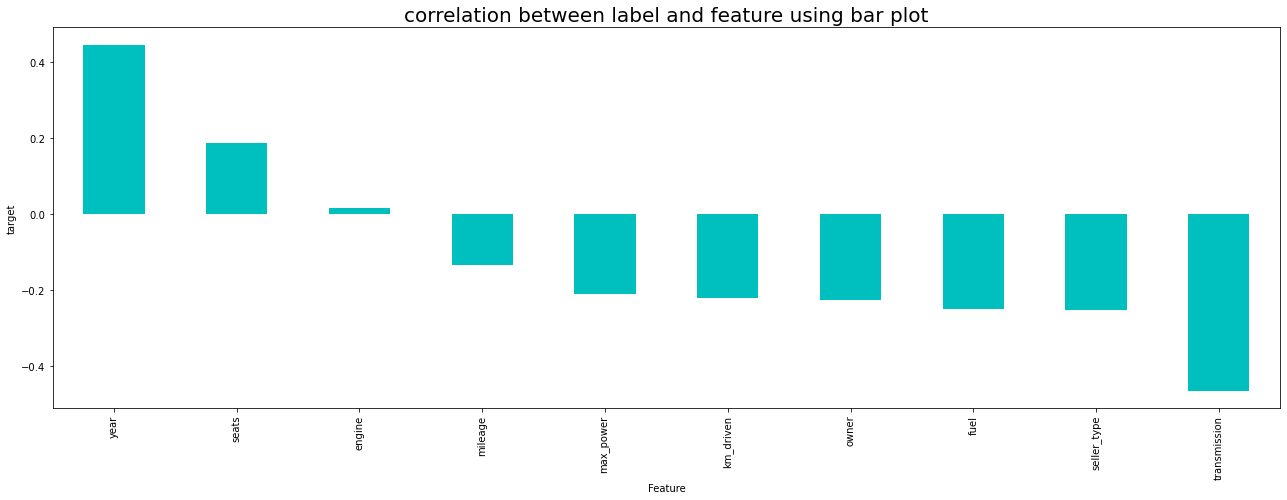

In [69]:
plt.figure(figsize=(22,7))
new_df.corr()['selling_price'].sort_values(ascending=False).drop(['selling_price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

oBSERVATIONS

Positive Correlation

      Year Have High Positive  Correlation
      Engine Have High Positive Correlation

Negative Correlation

Transmission Have High Negative Correlation
Seller_tyre have High Negative Correlation
Fuel have Negative Correlation
Owner Have Negativa Correlation

# Model Building

In [75]:
x = new_df.drop("selling_price", axis=1)
y = new_df["selling_price"]

In [76]:
#Lets check for the shape of the x
x.shape

(6677, 10)

In [77]:
#Lets check for the shape of y
y.shape

(6677,)

# Checking for skewness

In [78]:
x.skew()

year           -0.650771
km_driven       0.789826
fuel            0.163873
seller_type    -2.303689
transmission   -2.944556
owner           1.127413
mileage        -0.023026
engine          0.737602
max_power      -0.856661
seats           1.724091
dtype: float64

# Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0.098453,1.735956,-0.894076,0.313973,0.307555,-0.710793,0.972726,-0.832776,0.497165,-0.442287
1,0.098453,1.142311,-0.894076,0.313973,0.307555,0.886907,0.390683,-0.261232,-2.032175,-0.442287
2,-2.028958,1.607915,1.099827,0.313973,0.307555,2.484607,-0.495260,-0.287212,0.600170,-0.442287
3,-0.965253,1.305273,-0.894076,0.313973,0.307555,-0.710793,0.869709,-0.547004,1.103748,-0.442287
4,-1.763032,1.142311,1.099827,0.313973,0.307555,-0.710793,-0.907326,-0.806797,1.000744,-0.442287


# Checking VIF- Variance Inflation Factor values

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.984961,year
1,1.701159,km_driven
2,1.638331,fuel
3,1.064185,seller_type
4,1.174227,transmission
5,1.301541,owner
6,2.267576,mileage
7,1.282736,engine
8,1.551476,max_power
9,1.863298,seats


# Lets Build Model

In [81]:
#Lets create with random forest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [82]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5782479291643875 on Random State 179


In [83]:

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=463)

In [84]:
regressors = {
    
    'Random Forest' : LinearRegression(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]
results

,MAE,MSE,RMSE,R2-score
Random Forest,201383.259,1.365130e+11,369476.676116,0.515


# Best fit line

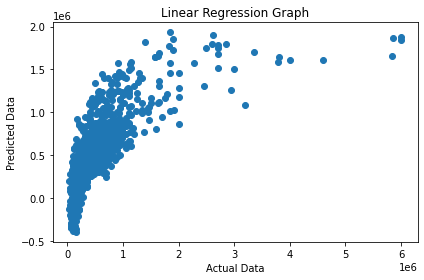

In [85]:
plt.scatter(y_test,pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Linear Regression Graph')
plt.tight_layout()

# Cross - Validation of the mode

In [86]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [87]:
# from sklearn.model_selection import cross_val_score
for j in range(2,10):
    isscore = cross_val_score(lr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 2
Cross validation score is:- 50.66038623497063
accuracy_score is:- 51.52312188408506


At cv:- 3
Cross validation score is:- 49.94249947010263
accuracy_score is:- 51.52312188408506


At cv:- 4
Cross validation score is:- 49.938241499405535
accuracy_score is:- 51.52312188408506


At cv:- 5
Cross validation score is:- 50.26003130264732
accuracy_score is:- 51.52312188408506


At cv:- 6
Cross validation score is:- 49.45993826569757
accuracy_score is:- 51.52312188408506


At cv:- 7
Cross validation score is:- 49.92660817940842
accuracy_score is:- 51.52312188408506


At cv:- 8
Cross validation score is:- 49.97527492994126
accuracy_score is:- 51.52312188408506


At cv:- 9
Cross validation score is:- 50.24474580887798
accuracy_score is:- 51.52312188408506




# Lets do Hyperparameter Tuning

In [88]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [89]:
lasscv=LassoCV(alphas = None , max_iter =100,normalize=True)
lasscv.fit(X_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [90]:
#best alpha paremetere
alpha=lasscv.alpha_
alpha

3.4336113294037323

In [91]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=3.4336113294037323)

In [92]:

lasso_reg.score(X_test,y_test)

0.5152278051343144

So, what its indicate now ,why we are trying Lasso regression beacuse we thought that linear regression is overfitted here also getting a same result which means that we either use a linear regression or lasso both are giving same .it means our model has not over fitted . so that conclusion is we can make here . our model is not over fitted.

# Using Ridge Regression Model.

# Ridge will return best alpha and coefficients after performing 10 Cross validation.

In [93]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [94]:

ridgecv.alpha_

0.001

In [95]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.001)

In [96]:
ridge_model.score(X_test,y_test)

0.5152312049664354

we got around same R2 using ridge regression as well . so its safe to say there is no overfitting

In [99]:
import pickle
filename=(' Linear Regression Project 1.0')
pickle.dump(lr,open(filename,'wb'))

In [101]:
loaded_model=pickle.load(open(' Linear Regression Project 1.0','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

51.52312188408506


In [102]:
conclusion=pd.DataFrame([loaded_model.predict(X_train)[:],pred[:]],index=['predicted','original'])

In [103]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5331,5332,5333,5334,5335,5336,5337,5338,5339,5340
predicted,412771.565562,515011.242890,1.484031e+06,265622.692384,1.385271e+06,941877.069699,589671.687691,578741.725201,822423.458684,1.414750e+06,...,659368.574913,710243.33461,509608.640269,-12472.589081,347231.358905,250788.074279,58414.979907,738855.250332,698429.308422,383661.942846
original,993805.518028,679217.928936,1.512390e+06,118882.141001,-1.887022e+05,-19240.063025,175719.129184,890689.152618,437628.382160,3.427550e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
